<h2>2_Scaling e Normalization</h2>

In [3]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

Matplotlib is building the font cache; this may take a moment.


<h1> Scaling x Normalization: Qual a diferença? </h1>

Uma das razões que é fácil confundir scaling e normalização é por que esses termos não intercambiáveis  e para trazer mais confusão eles são muito similares. Nos dois casos, você está transformando os valores númericos das variáveis para que esses valores transformados tenham propriedades específicas. A diferença entre os dois está:

<b> No Scaling,</b> você está mudando o intervalo dos seus dados.

<b> Em Normalization </b> você está mudando a forma da distribuição dos seus dados.

Vamos falar mais profundamente sobre essas opções:

<h1> Scaling </h1>

Significa que você está transformando seus dados para que eles caibam em uma scala específica, como 0-100 ou 0-1. Você que aplicar o scaling nos seus dados quando estamos utilizando métodos baseados em medidas de quão longe os pontos dos seus dados estão, como SVM ou KNN. Com esse algoritmos, uma mudança de "1" em qualquer coluna nos dá a mesma importância.

Por exemplo, você pode estar olhando os preços de algum produto em Yen e Dollar. 1 Dolar deve valer 100 Yen, porém se você não aplicar o scale nos seus preços, métodos como SVM ou KNN vão considerar a diferença de 1 Yen tão importante quanto 1 Dollar. Isso claramente não ajusta com nossa intuição sobre o mundo. Com moedas você pode aplicar o scaling. Porém se você estiver olhando algo como altura e peso? Não está totalmente claro quantos kg é igual a 1 metro.

Aplicando o scaling nas suas variáveis, você pode comparar diferentes variáveis em um pé de igualdade. Para deixar claro, vamos ver o que o scaling se parece.

C:\Users\thiag\anaconda3\envs\Linear_Regression\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thiag\anaconda3\envs\Linear_Regression\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

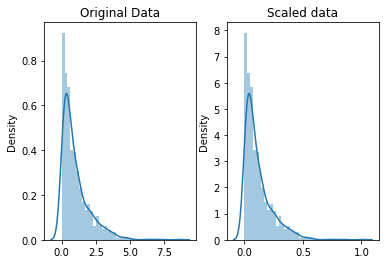

In [4]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")


Note que a forma dos dados não mudou, porém seu intervalo de 0-8 foi para 0-1.

<h1> Normalization </h1>

Scaling apenas mudou o intervalo dos seus dados. Normalization é uma mudança mais radical. O ponto da normalização é mudar seus observações para que elas sejam descritas como uma distribuição normal. 

<b>Distribuição Normal</b>: Também conhecida como "curva do sino", é uma distribuição estatística específica em que observações aproximadamente iguais ficam acima e abaixo da média, a média e a mediana são iguais e há mais observações mais próximas da média. A distribuição normal também é conhecida como distribuição Gaussiana.

Em geral, você irá normalizar seus dados se você utilzar algum algoritmo de machine learning que assuma que seus dados estão em uma distribuição normal. Um exemplo é o algoritmo Gaussian Naive Bayes.

C:\Users\thiag\anaconda3\envs\Linear_Regression\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thiag\anaconda3\envs\Linear_Regression\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

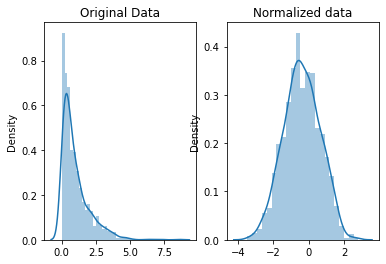

In [5]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

Note que a forma dos seus daddos mudaram.

<h1> Exercícios </h1>

<b> Importante:</b>Para esse tutorial baixe os dados do seguinte link:
https://www.kaggle.com/kemical/kickstarter-projects

In [8]:
import pandas as pd
import numpy as np


from scipy import stats


from mlxtend.preprocessing import minmax_scaling


import seaborn as sns
import matplotlib.pyplot as plt


kickstarters_2017 = pd.read_csv("ks-projects-201801.csv")


np.random.seed(0)

Vamos começar dimensionando as metas de cada campanha, que é quanto dinheiro eles estavam pedindo. Os gráficos mostram um histograma dos valores na coluna "usd_goal_real", antes e depois do dimensionamento.

C:\Users\thiag\anaconda3\envs\Linear_Regression\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thiag\anaconda3\envs\Linear_Regression\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

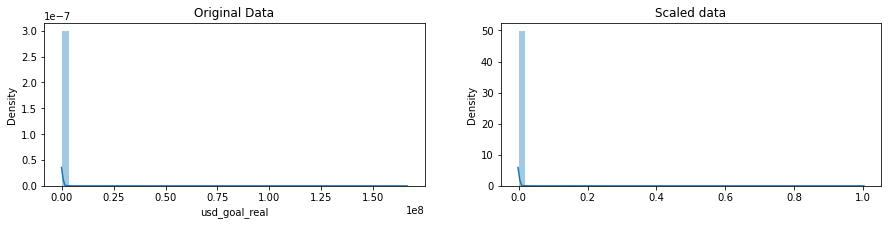

In [9]:
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)


scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])


fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Após o escalonamento, todos os valores ficam entre 0 e 1 (você pode ler isso no eixo horizontal do segundo gráfico acima, e verificamos na célula de código abaixo).

In [10]:
print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


# 1) Pratique scaling

Acabamos de dimensionar a coluna "usd_goal_real". E quanto à coluna "meta"?

Comece executando a célula de código abaixo para criar um DataFrame `original_goal_data` contendo a coluna" objetivo ".'

In [11]:
original_goal_data = pd.DataFrame(kickstarters_2017.goal)
original_goal_data

,goal
0,1000.0
1,30000.0
2,45000.0
3,5000.0
4,19500.0
...,...
378656,50000.0
378657,1500.0
378658,15000.0
378659,15000.0


Use `original_goal_data` para criar um novo DataFrame` scaled_goal_data` com valores escalados entre 0 e 1. Você deve usar a função `minimax_scaling ()`.

In [ ]:
#Digite seu código aqui

<details><summary>Clique aqui para ver a resposta.</summary>

```python
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])
```

</details>


# 2) Normalização prática

Agora você vai praticar a normalização. Começamos normalizando a quantia de dinheiro prometida para cada campanha.

C:\Users\thiag\anaconda3\envs\Linear_Regression\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thiag\anaconda3\envs\Linear_Regression\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

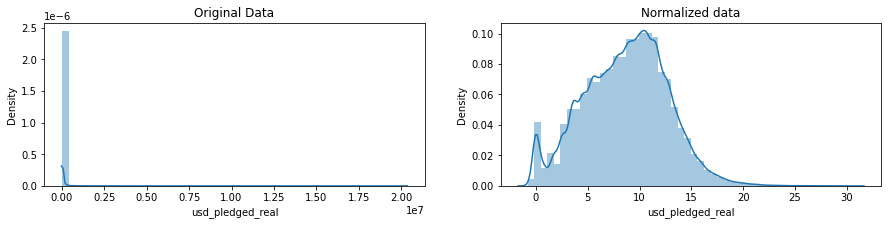

In [13]:
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0


positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]


normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)


fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

Não é perfeito, mas está muito mais próximo de uma distribuição normal!

In [14]:
print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


Usamos a coluna "usd_pledged_real". Siga o mesmo processo para normalizar a coluna "predged".

In [ ]:
#Seu código aqui

<details><summary>Clique aqui para ver a resposta.</summary>

```python
index_positive_pledges = kickstarters_2017.pledged > 0


positive_pledges_only = kickstarters_2017.pledged.loc[index_positive_pledges]


normalized_values = pd.Series(stats.boxcox(positive_pledges_only)[0], 
                              name='pledged', index=positive_pledges_only.index)


fig, ax = plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_pledges_only, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_values, ax=ax[1])
ax[1].set_title("Normalized data")
```

</details>